In [5]:
# from utils import data_generator

from tcn import compiled_tcn
from sklearn.preprocessing import OneHotEncoder
h = 0
import pandas as pd
import numpy as np
train_features = pd.read_csv("C:/Users/sumed/Desktop/Spring20/may/Train_T_GT.csv", header=None)
test_features = pd.read_csv("C:/Users/sumed/Desktop/Spring20/may/Test_T_GT.csv", header=None)
x_train = train_features.iloc[:, 1:].values.astype('float32')
y_train = np.array(train_features[208])
x_test = test_features.iloc[:, 1:].values.astype('float32')
y_test = np.array(test_features[208])

max_features = 4913
maxlen = 208
batch_size = 32


xtest_3d = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
xtrain_3d = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

print("3d test ", xtest_3d.shape)
print('3d train ',xtrain_3d.shape)


# ONE HOT ENCODING
test_df = pd.DataFrame(y_test)
train_df = pd.DataFrame(y_train)
tl_total = test_df.append(train_df)
tl_reshape = tl_total.values.reshape(-1,1)
tl_oHe = OneHotEncoder().fit_transform(tl_reshape).toarray()
tldf = pd.DataFrame(tl_oHe)
df1 = tldf.iloc[:27, :]
df2 = tldf.iloc[27:, :]
test_label_categorical = df1.values
train_label_categorical = df2.values
print('train categorical ',train_label_categorical.shape)
print('test categorical ', test_label_categorical.shape)


ytrain_3d = train_label_categorical.reshape((train_label_categorical.shape[0], train_label_categorical.shape[1], 1))
ytest_3d = test_label_categorical.reshape((test_label_categorical.shape[0], test_label_categorical.shape[1], 1))

print("3d test y ", ytest_3d.shape)
print('3d train y ',ytrain_3d.shape)


def run_task():
    # (x_train, y_train), (x_test, y_test) = data_generator()

    model = compiled_tcn(return_sequences=False,
                         num_feat=1,
                         num_classes=10,
                         nb_filters=20,
                         kernel_size=6,
                         dilations=[2 ** i for i in range(9)],
                         nb_stacks=1,
                         max_len=x_train[0:1].shape[1],
                         use_skip_connections=True)

    print(f'x_train.shape = {x_train.shape}')
    print(f'y_train.shape = {y_train.shape}')
    print(f'x_test.shape = {x_test.shape}')
    print(f'y_test.shape = {y_test.shape}')

    model.summary()

    history = model.fit(xtrain_3d, ytrain_3d.squeeze().argmax(axis=1), epochs=10, validation_data=(xtest_3d, ytest_3d.squeeze().argmax(axis=1)))
    model.save('tcn.h5')
    return history

if __name__ == '__main__':
    h = run_task() 


3d test  (27, 208, 1)
3d train  (4913, 208, 1)
train categorical  (4913, 9)
test categorical  (27, 9)
3d test y  (27, 9, 1)
3d train y  (4913, 9, 1)


C:\Users\sumed\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


x.shape= (?, 20)
model.x = (?, 208, 1)
model.y = (?, 10)
x_train.shape = (4913, 208)
y_train.shape = (4913,)
x_test.shape = (27, 208)
y_test.shape = (27,)
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 208, 1)]          0         
_________________________________________________________________
tcn (TCN)                    (None, 20)                41320     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
activation_83 (Activation)   (None, 10)                0         
Total params: 41,530
Trainable params: 41,530
Non-trainable params: 0
_________________________________________________________________
Train on 4913 samples, validate on 27 samples
Epoch 1/10
4913/4913 [==============================

In [9]:
# from utils import data_generator

from tcn import compiled_tcn
from sklearn.preprocessing import OneHotEncoder
h2 = 0
import pandas as pd
import numpy as np
train_features = pd.read_csv("C:/Users/sumed/Desktop/Spring20/may/Train_T_GT.csv", header=None)
test_features = pd.read_csv("C:/Users/sumed/Desktop/Spring20/may/Test_T_GT.csv", header=None)
x_train = train_features.iloc[:, 1:].values.astype('float32')
y_train = np.array(train_features[208])
x_test = test_features.iloc[:, 1:].values.astype('float32')
y_test = np.array(test_features[208])

max_features = 4913
maxlen = 208
batch_size = 32


xtest_3d = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
xtrain_3d = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

print("3d test ", xtest_3d.shape)
print('3d train ',xtrain_3d.shape)


# ONE HOT ENCODING
test_df = pd.DataFrame(y_test)
train_df = pd.DataFrame(y_train)
tl_total = test_df.append(train_df)
tl_reshape = tl_total.values.reshape(-1,1)
tl_oHe = OneHotEncoder().fit_transform(tl_reshape).toarray()
tldf = pd.DataFrame(tl_oHe)
df1 = tldf.iloc[:27, :]
df2 = tldf.iloc[27:, :]
test_label_categorical = df1.values
train_label_categorical = df2.values
print('train categorical ',train_label_categorical.shape)
print('test categorical ', test_label_categorical.shape)


ytrain_3d = train_label_categorical.reshape((train_label_categorical.shape[0], train_label_categorical.shape[1], 1))
ytest_3d = test_label_categorical.reshape((test_label_categorical.shape[0], test_label_categorical.shape[1], 1))

print("3d test y ", ytest_3d.shape)
print('3d train y ',ytrain_3d.shape)


def run_task():
    # (x_train, y_train), (x_test, y_test) = data_generator()

    model2 = compiled_tcn(return_sequences=False,
                         num_feat=1,
                         num_classes=10,
                         nb_filters=20,
                         kernel_size=6,
                         dilations=[2 ** i for i in range(9)],
                         nb_stacks=1,
                         max_len=x_train[0:1].shape[1],
                         use_skip_connections=True)

    print(f'x_train.shape = {x_train.shape}')
    print(f'y_train.shape = {y_train.shape}')
    print(f'x_test.shape = {x_test.shape}')
    print(f'y_test.shape = {y_test.shape}')

    model2.summary()

    history = model2.fit(xtrain_3d, ytrain_3d.squeeze().argmax(axis=1), epochs=10, validation_data=(xtest_3d, ytest_3d.squeeze().argmax(axis=1)))
    model2.save('tcn_model2.h5')
    return history

if __name__ == '__main__':
    h2 = run_task()

3d test  (27, 208, 1)
3d train  (4913, 208, 1)
train categorical  (4913, 9)
test categorical  (27, 9)
3d test y  (27, 9, 1)
3d train y  (4913, 9, 1)


C:\Users\sumed\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


x.shape= (?, 20)
model.x = (?, 208, 1)
model.y = (?, 10)
x_train.shape = (4913, 208)
y_train.shape = (4913,)
x_test.shape = (27, 208)
y_test.shape = (27,)
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 208, 1)]          0         
_________________________________________________________________
tcn (TCN)                    (None, 20)                41320     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
_________________________________________________________________
activation_195 (Activation)  (None, 10)                0         
Total params: 41,530
Trainable params: 41,530
Non-trainable params: 0
_________________________________________________________________
Train on 4913 samples, validate on 27 samples
Epoch 1/10
4913/4913 [==============================

In [12]:
import matplotlib.pyplot as plt

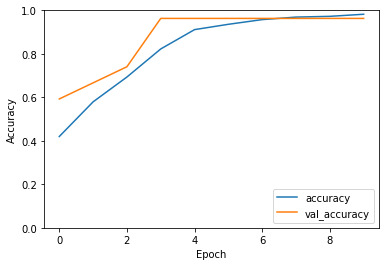

In [13]:
plt.plot(h2.history['accuracy'], label='accuracy')
plt.plot(h2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')